In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv("Language_Detection.csv")

In [3]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
dict(data["Language"].value_counts())

{'English': 1385,
 'French': 1014,
 'Spanish': 819,
 'Portugeese': 739,
 'Italian': 698,
 'Russian': 692,
 'Sweedish': 676,
 'Malayalam': 594,
 'Dutch': 546,
 'Arabic': 536,
 'Turkish': 474,
 'German': 470,
 'Tamil': 469,
 'Danish': 428,
 'Kannada': 369,
 'Greek': 365,
 'Hindi': 63}

<function matplotlib.pyplot.show(close=None, block=None)>

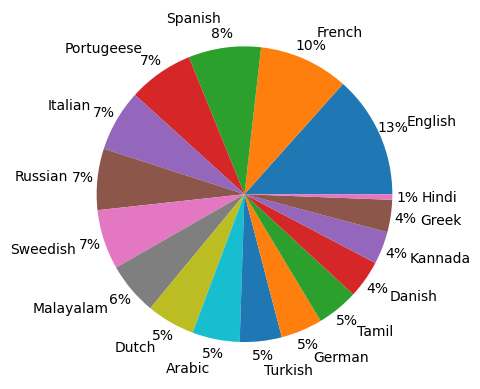

In [5]:
plt.pie(dict(data["Language"].value_counts()).values(),labels=dict(data["Language"].value_counts()).keys(),autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show

In [6]:
X = data["Text"]
Y = data["Language"]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
vectoriser = TfidfVectorizer()
vectoriser.fit(X)

TfidfVectorizer()

In [9]:
x_train_tfid = vectoriser.transform(x_train)
x_test_tfid = vectoriser.transform(x_test)

In [10]:
model_svc = SVC()
model_random_forest = RandomForestClassifier()

In [12]:
model_svc.fit(x_train_tfid,y_train)

SVC()

In [13]:
model_random_forest.fit(x_train_tfid,y_train)

RandomForestClassifier()

In [14]:
y_pred_svc = model_svc.predict(x_test_tfid)
y_pred_random_forest = model_random_forest.predict(x_test_tfid)

In [15]:
print("Accuracy Score using SVC is ",accuracy_score(y_test,y_pred_svc))
print("Accuracy Score using Random forest classifier is ",accuracy_score(y_test,y_pred_random_forest))

Accuracy Score using SVC is  0.9458413926499033
Accuracy Score using Random forest classifier is  0.9231141199226306


In [16]:
my_labels = ['Arabic','Danish','Dutch','English','French','German','Greek','Hindi','Italian','Kannada','Malayalam','Portugeese','Russian','Spanish','Sweedish','Tamil','Turkish']

<Figure size 600x600 with 0 Axes>

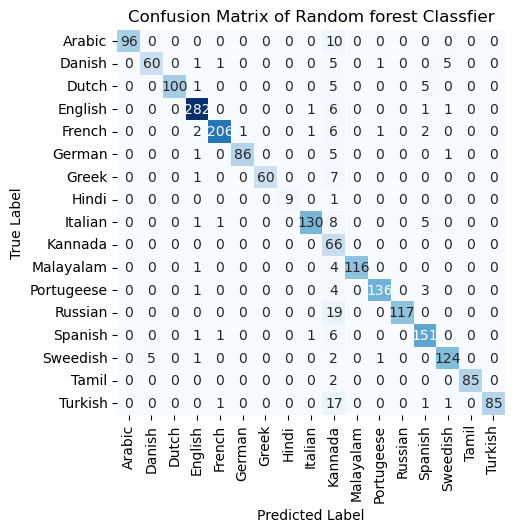

<Figure size 600x600 with 0 Axes>

In [36]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
# plt.subplot()
plt.figure(figsize=(5, 5))
sb.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=my_labels,yticklabels=my_labels)
plt.title('Confusion Matrix of Random forest Classfier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.figure(figsize=(6, 6))

<Figure size 600x600 with 0 Axes>

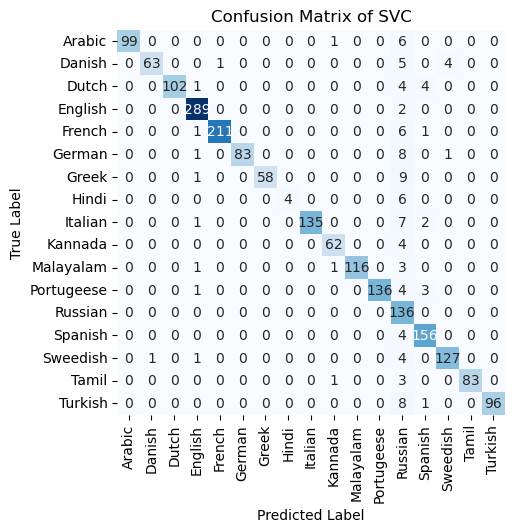

<Figure size 600x600 with 0 Axes>

In [27]:
plt.figure(figsize=(5, 5))
sb.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=my_labels,yticklabels=my_labels)
plt.title('Confusion Matrix of SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.figure(figsize=(6, 6))

In [32]:
print("classification report of SVC: \n",classification_report(y_test,y_pred_svc))

classification report of SVC: 
               precision    recall  f1-score   support

      Arabic       1.00      0.93      0.97       106
      Danish       0.98      0.86      0.92        73
       Dutch       1.00      0.92      0.96       111
     English       0.97      0.99      0.98       291
      French       1.00      0.96      0.98       219
      German       1.00      0.89      0.94        93
       Greek       1.00      0.85      0.92        68
       Hindi       1.00      0.40      0.57        10
     Italian       1.00      0.93      0.96       145
     Kannada       0.95      0.94      0.95        66
   Malayalam       1.00      0.96      0.98       121
  Portugeese       1.00      0.94      0.97       144
     Russian       0.62      1.00      0.77       136
     Spanish       0.93      0.97      0.95       160
    Sweedish       0.96      0.95      0.96       133
       Tamil       1.00      0.95      0.98        87
     Turkish       1.00      0.91      0.96      

In [33]:
print("classification report of Random Forest Classifier: \n",classification_report(y_test,y_pred_random_forest))

classification report of Random Forest Classifier: 
               precision    recall  f1-score   support

      Arabic       1.00      0.91      0.95       106
      Danish       0.92      0.82      0.87        73
       Dutch       1.00      0.90      0.95       111
     English       0.96      0.97      0.97       291
      French       0.98      0.94      0.96       219
      German       0.99      0.92      0.96        93
       Greek       1.00      0.88      0.94        68
       Hindi       1.00      0.90      0.95        10
     Italian       0.98      0.90      0.94       145
     Kannada       0.38      1.00      0.55        66
   Malayalam       1.00      0.96      0.98       121
  Portugeese       0.98      0.94      0.96       144
     Russian       1.00      0.86      0.92       136
     Spanish       0.90      0.94      0.92       160
    Sweedish       0.94      0.93      0.94       133
       Tamil       1.00      0.98      0.99        87
     Turkish       1.00     

In [35]:
test = ["किसी भी विषय की अपनी एक लयबद्धता होती है। अपने नियम-आयाम होते हैं। अपने दायरे और क्षेत्र होते हैं। जैसे विज्ञान के लिए कहा जाता है कि विज्ञान किसी भी विषय का सुव्यवस्थित, सुसंगठित एवं क्रमबद्ध ज्ञान होता है। इसी तरह से अगर हम साहित्य की बात करें तो साहित्य अपने आप में भाव समेटे होता है। उसमें एक रस होता है। फिर वह वीर रस, वात्सल्य रस, वियोग, करुणा अथवा प्रेम कुछ भी हो सकता है। हम ऐसे साहित्य की कल्पना नहीं कर सकते हैं, जिसमें कोई भाव ही न हो। इसी तरह से गणित का भी अपना एक गुण होता है। अपनी एक आभा होती है। इसका दायरा असीमित है। यह दायरे को नहीं मानता है। यह ज्ञान का ऐसा किरण पुंज है, जिसकी रोशनी व मार्गदर्शन की सभी विषयों को किसी न किसी स्तर पर ज़रूरत पड़ती रहती है। गणित का एक गुण यह भी होता है कि इसकी हर अगली सीढ़ी चढ़ने के लिए उसका पिछली सीढ़ी से सामंजस्य होना आवश्यक होता है। गणित टूटी हुई सीढ़ियां कभी नहीं चढ़ता है। यह छलांग नहीं लगाता। संगीत की तरह यह सतत लय मांगता है। ठीक वैसे ही, जैसे किसी संगीतज्ञ के संगीत यंत्र का तार अगर बीच में कहीं बाधित हुआ तो फिर उसकी तरंगें आगे यात्रा नहीं कर पातीं। फिर बाकी सभी तार चाहे जितने नवीन और गुणवत्तापूर्ण क्वालिटी के हों, संगीतज्ञ चाहे जितना प्रवीण हो, किंतु संगीत उत्पन्न नहीं हो पाता है। ज्ञान से परिपूर्ण गणित का भी ऐसा ही स्वभाव है। गणित के किसी भी प्रमेय को सिद्ध करने के लिए उसे कई-कई सिद्ध प्रमेयों का सीढ़ियों की भांति सहारा लेना पड़ता है। अगर बीच मार्ग में कोई एक तर्क फेल हुआ या वह अगले शर्त को संतुष्ट नहीं कर रहा है तो गणित उस संकल्पना को मानने से नकार देता है या फिर समय लेता है और आगे की गुत्थियां सुलझाता है। और जब उनके तार (प्रमेयों को) जोड़ लेता है, और उन तारों से गणित के तर्क व प्रमेय (संगीत) प्रवाहित होने लगते हैं तब गणित उन्हें प्रमाणित करता है। किंतु छलांग नहीं लगाता। भले ही वो चीजें स्पष्ट रूप से सिद्ध साबित हो रही हों।","ಇತ್ತೀಚಿನ ದಿನಗಳಲ್ಲಿ, ತಂತ್ರಜ್ಞಾನವು ಜೀವನದ ಪ್ರಮುಖ ಭಾಗವಾಗಿದೆ. ಇದು ಜನರಿಗೆ ಕೆಲಸವನ್ನು ಸುಲಭಗೊಳಿಸಲು ಸಹಾಯ ಮಾಡುತ್ತದೆ ಮತ್ತು ಜೀವನವನ್ನು ಉತ್ತಮಗೊಳಿಸುತ್ತದೆ. ಅದರಲ್ಲಿ ಕಂಪ್ಯೂಟರ್ ಕೂಡ ಒಂದು. ಕಂಪ್ಯೂಟರ್ ಒಂದು ಎಲೆಕ್ಟ್ರಾನಿಕ್ ಸಾಧನವಾಗಿದೆ. ಇದು ಸಂದೇಶ ಕಳುಹಿಸುವಿಕೆ, ಲೆಕ್ಕಾಚಾರಗಳು, ಬರವಣಿಗೆ, ಡೇಟಾವನ್ನು ಸಂಗ್ರಹಿಸುವುದು, ಮುದ್ರಣ ಇತ್ಯಾದಿಗಳಂತಹ ಅನೇಕ ಕಾರ್ಯಗಳನ್ನು ನಿರ್ವಹಿಸುತ್ತದೆ. ನಾವು ಎಲ್ಲಾ ವಿದ್ಯಾರ್ಥಿಗಳಿಗೆ ಕಂಪ್ಯೂಟರ್‌ಗಳ ಪ್ರಾಮುಖ್ಯತೆಯ ಕುರಿತು ಸುಲಭವಾದ ಪ್ರಬಂಧಗಳನ್ನು ಹಂಚಿಕೊಳ್ಳಲಿದ್ದೇವೆ. ಈ ಪ್ರಬಂಧವು ವಿದ್ಯಾರ್ಥಿಗಳಿಗೆ ಸಹಾಯಕವಾಗಿದೆ.","Il est pensé que ce fut, en plus du grand nombre de candidats, le large taux d’abstention qui coûta sa place aux deuxième tour au premier ministre Lionel Jospin. Il renona d’ailleurs la position de ‘leader’ de la gauche socialiste après cette défaite, si humiliante pour son parti et si inattendue. Etre battu par un pourcentage si faible fut pris comme un vote de non-confiance en son parti","Meine Familie ist eine kleine Kernfamilie, die zu einer bürgerlichen Familie gehört. Meine Familie besteht aus vier Mitgliedern, einem Vater, einer Mutter, mir und einer kleinen Schwester."]
print(test)
print()
print()
testtfid = vectoriser.transform(test)
print("Predication by SVC",model_svc.predict(testtfid))
print("Predication by Random Forest Classifier",model_random_forest.predict(testtfid))

['किसी भी विषय की अपनी एक लयबद्धता होती है। अपने नियम-आयाम होते हैं। अपने दायरे और क्षेत्र होते हैं। जैसे विज्ञान के लिए कहा जाता है कि विज्ञान किसी भी विषय का सुव्यवस्थित, सुसंगठित एवं क्रमबद्ध ज्ञान होता है। इसी तरह से अगर हम साहित्य की बात करें तो साहित्य अपने आप में भाव समेटे होता है। उसमें एक रस होता है। फिर वह वीर रस, वात्सल्य रस, वियोग, करुणा अथवा प्रेम कुछ भी हो सकता है। हम ऐसे साहित्य की कल्पना नहीं कर सकते हैं, जिसमें कोई भाव ही न हो। इसी तरह से गणित का भी अपना एक गुण होता है। अपनी एक आभा होती है। इसका दायरा असीमित है। यह दायरे को नहीं मानता है। यह ज्ञान का ऐसा किरण पुंज है, जिसकी रोशनी व मार्गदर्शन की सभी विषयों को किसी न किसी स्तर पर ज़रूरत पड़ती रहती है। गणित का एक गुण यह भी होता है कि इसकी हर अगली सीढ़ी चढ़ने के लिए उसका पिछली सीढ़ी से सामंजस्य होना आवश्यक होता है। गणित टूटी हुई सीढ़ियां कभी नहीं चढ़ता है। यह छलांग नहीं लगाता। संगीत की तरह यह सतत लय मांगता है। ठीक वैसे ही, जैसे किसी संगीतज्ञ के संगीत यंत्र का तार अगर बीच में कहीं बाधित हुआ तो फिर उसकी तरंगें आगे यात्रा नह